In [2]:
from qiskit import QuantumCircuit, BasicAer, execute
import numpy as np
import matplotlib.pyplot as plt

# Lista 10 (9 pkt.) Termin: 9.02.2021r.

## Zadanie 1 (6 pkt.)

Zaimplementujemy protokół kwantowej dystrybucji klucza. Mmay Alicję i Boba, chcemy aby oboje ustalili wspólny klucz, który będzie znany tylko im i nikomu innemu. Używając kwantowego protokołu możemy zrobić to w sposób bezpieczny. Zaimplemnentujemy tu algorytm BB84. Najpierw zauważmy, ze w przestrzeni kubitu możemy wprowadzić rózne bazy. Jedną z nich może być baza wektórów własnych operatora $Z$, czyli standardowa baza, w której przebiegają obliczenia składa się ona z wektorów $\{|0\rangle,|1\rangle\}$. Inną baza jest baza wektórów własnych operatora $X$, która składa się z wektorów $\{|+\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right),|-\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle-|1\rangle\}\right)$. Jeżeli naszymi kubitami są fotony to możemy przyjąć, że stan $|0\rangle$ to foton o polaryzacji poziomej (drgajacy poziomo), stan $|1\rangle$ to foton o polaryzacji pionowej, stan $|+\rangle$ to foton o polaryzacji skośnej w jedną stronę a stan $|-\rangle$ to foton o polaryzacji skośnej w drugą stronę.

<img src="rysunek.png" width="500" align="center"/>

Alicja moze genrować fotony w dowolnym, ze stanów: $\{|0\rangle,|1\rangle\,|+\rangle,|-\rangle\}$, np. przepuszczajac fotony przez polaryzator obrócony o odpowiedni kąt. Alicja będzie genowac stany losowo. Dla sprawdzenia poprawności ustawiamy ziarno generatora pseudolosowego, aby w każdym uruchomieniu wyniki były takie same.

In [26]:
np.random.seed(2)

Najpierw generuje losowy ciąg bitów o długości powiedzmy 100:

In [27]:
Alice_bits=np.random.randint(0,2,100)

In [28]:
Alice_bits

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

Następnie musi wygenerować losowy ciąg baz, zatem generuje znowu losowy ciąg bitów, i przyjmuje, że $0$ odpowiada bazie $Z$ a $1$ bazie $X$. Oba losowe ciągi Alicja, póki co, zachowuje wyłacznie dla siebie.

In [29]:
#wylosuj bazy
Alice_bases=np.random.randint(0,2,100)

In [30]:
Alice_bases

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

Ciag bitów wygląda tak: [0,1,1,...] a ciąg baz tak [0,1,0,..] oznacza to, ze pierwszy foton (nasz kubit) Alicja koduje w bazie $0$ czyli w bazie $Z$ i przypisuje mu bit $0$ czyli stan $|0\rangle$, drugi foton koduje w bazie $1$ czyli $X$ przypisuje mu bit $1$ czyli stan $|-\rangle$, trzeci foton w bazie $0$ czyli $Z$ przypsiuje mu bit $1$ czyli stan $|1\rangle$, itd. Musimy zatem stworzyć obwody kwantowe generujące odpowiednie stany. W rzeczywistości byłyby to fotony  a ich stany byłyby  ustawiane za pomocą polaryzatora, my robimy to na komputerze kwantowym (a właściwie na symulatorze), zamisat fotonów mamy kubity i zmieniamy ich stan aplikując odpowiednie bramki. Napisz funkcję, która jako argumenty przyjmuje listy $bits$ i $bases$, a zwraca listę obwodów kwantowych generujących odpowiednie stany, nie dodawaj pomiaru na końcu obwodu, dodaj na końcu barrierę dla lepszej wizualizacji poszczególnych etapów, oraz dodaj jeden bit klasyczny, który bedzie potrzebny do późniejszych pomiarów.

In [31]:
def prepare_states(bits,bases):
    states = []
    if not len(bits)==len(bases):
        print("Rozna dlugosc tabeli")
        return
    for i in range(len(bits)):
        qc = QuantumCircuit(1,1)
        if bits[i] == 1:
            qc.x(0)
        if bases[i] == 1:   #baza X (bramka H)
            qc.h(0)
        qc.barrier()
        states.append(qc)
    return states

Alicja generuje stany:

In [32]:
states=prepare_states(Alice_bits,Alice_bases)

Tak powinno wyglądać trzy pierwsze stany z listy:

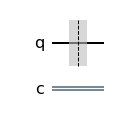

In [33]:
states[0].draw(output='mpl')

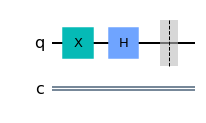

In [34]:
states[1].draw(output='mpl')

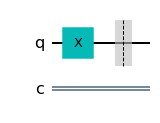

In [35]:
states[2].draw(output='mpl')

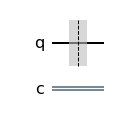

In [36]:
states[3].draw(output='mpl')


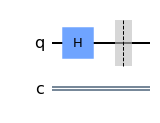

In [37]:
states[4].draw(output='mpl')

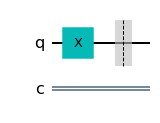

In [38]:
states[5].draw(output='mpl')

Następnie Alicja powinna wysłać tak przygotowane fotony Bobowi, w naszym przypadku mamy do dyspozycji kubity na stałe osadzone w komputerze kwantowym zatem zakladamy, że teraz przejął je Bob i wykonuje na nich operacje. Bob na otrzymanych od Alicji kubitach dokonuje pomiaru, jednak nie wie w jakiej bazie dokonać pomiaru bo Alicja używała losowo wybranych baz. Zatem Bob losuje bazy w których będzie dokonywał pomiaru (oczywiście dostanie inny ciąg baz niż Alicja ale jak się przekonamy to nic nie szkodzi).

In [39]:
#wylosuj bazy Boba
Bob_bases=np.random.randint(0,2,100)

Aby dokonać pomiaru w bazie $Z$ nie musimy nic robić, po prostu dokonujemy pomiaru na kubicie, wynik $0$ odpowiada stanowi $|0\rangle$ a wynik $1$ stanowi $|1\rangle$. Aby dokonać pomairu w stanie $X$ musimy najpierw obrócić odpowiednio stan za pomocą bramki Hadamarda i dopiero potem dokonać pomiaru, wtedy wynik $0$ będzie odpowiadał stanowi $|+\rangle$ a wynik $1$ stanowi $|-\rangle$. Napisz funkcję, która jako argumenty przyjmuje stany $states$ otrzymane przez Boba od Alicji i wylosowane przez Boba bazy $Bob\_bases$ a zwraca bity bądące wynikami pomiarów Boba. Użyj symulatoraz pojedyńczym wykonaniem obwodu:

backend = BasicAer.get_backend('qasm_simulator')

execute(qc, backend, shots=1).result().get_counts()

In [40]:
def measure_states(states,bases):
    bits = []
    if not len(states)==len(bases):
        print("Rozna dlugosc tabeli")
        return
    for i in range(len(states)):
        qc = states[i]
        if bases[i] == 1:   #baza X (bramka H)
            qc.h(0)
        qc.measure([0],[0])
        backend = BasicAer.get_backend('qasm_simulator')
        x = execute(qc, backend, shots=1).result().get_counts()
        tmp = [int(k) for k in x.keys()]
        bits.append(tmp[0])
    return bits

In [41]:
Bob_bits=measure_states(states,Bob_bases)
print(Bob_bits)
print(len(Bob_bits))

[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0]
100


Tutaj wyniki bedą losowe, więc ich nie porównujemy. Zastanówmy się co się stało wyniku tych pomiarów. Zarówno Alicja jak i Bob używali losowo wybranych baz, zatem w niektórych przypadkach baza Alicji i Boba będzie taka sama a w niektórych nie. W przypadku gdy bazy są takie same Bob z pomiaru odczyta z prawdopodobieństwe równym 1 bit taki jaki zakodowała Alicja, tzn. jeżeli np. Alicja użyła bazy $X$ i zakodowała bit $0$ czyli wysłała stan $|+\rangle$ to Bob używając bazy $X$ do pomiaru z pradopodobieństwem równym jeden otrzyma wynik $0$ odpowiadający stanowi $|+\rangle$, jeżeli natomiast Bob użyje błędnej bazy to z prawdopodobieństwem $\frac{1}{2}$ odczyta poprawny bit a z prawdopobieństwem $\frac{1}{2}$ błędny. Jeżeli np. Alicja użyła bazy $X$ i zakodowała bit $0$ czyli wysłała stan $|+\rangle$ to Bob używając bazy $Z$ do pomiaru z prawdopodobieństwem równym $\frac{1}{2}$ otrzyma wynik $0$ odpowiadający stanowi $|+\rangle$ i z prawdopodobieństwem równym $\frac{1}{2}$ otrzyma wynik $1$ odpowiadający stanowi $|-\rangle$.

Następnie Alicja ujawnia bazy w których kodowały stany, czyli ujawnia ciąg $Alice\_bases$:

In [42]:
Alice_bases

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [43]:
Bob_bases

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

Alicja i Bob mogą teraz porównać swój wybór baz $Bob\_bases$ i $Alice\_bases$ i odrzucić ze swoich wyników te bity na których ich bazy nie są ze sobą zgodne. Napsiz funkcję, która jako argumenty przyjmuje bazy Boba i Alicji oraz bity kodowane przez Alicję $Alce\_bits$ oraz zmierzone przez Boba $Bob\_bits$ i zwraca dwa ciągi bitów, jeden Alicji a drugi Boba, które odpowiadają przypadkom kiedy bazy Alicji i Boba się zgadzały.

In [44]:
def common_bits(Alice_bases,Bob_bases,Alice_bits,Bob_bits):
    Alice_key, Bob_key = [], []
    index = []
    for i in range(len(Alice_bases)):
        if Alice_bases[i] == Bob_bases[i]:
            index.append(i)
            Alice_key.append(Alice_bits[i])
            Bob_key.append(Bob_bits[i])
    return Alice_key, Bob_key

In [45]:
Alice_key, Bob_key=common_bits(Alice_bases,Bob_bases,Alice_bits,Bob_bits)

W ten sposób Alicja i Bob otrzymali pewien klucz, który powinien być wspólny dla nich obu, o ile nie było podsłuchu po drodze (o tym co wtedy za chwilę). Aby Alicja i Bob sprawdzili czy nie było podsłuchu muszą ujawnić jakiś fragment swoich kluczy i go porównać, powiedzmy 15 pierwszych bitów.

In [46]:
print(Alice_key[:15]==Bob_key[:15])
print(Alice_key[:15])
print(Bob_key[:15])

True
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]


W ten sposób mają (z pewnym prawdopodobieństwem) przekonanie, że ich klucze są jednakowe i nikt inny ich nie zna. Możemy jeszcze sprawdzić, że rzeczywiście ich klucze są w całości jednakowe:

In [47]:
Alice_key==Bob_key

True

Oczywiście w rzeczywistości Alcija i Bob tego nie robią bo musieliby ujawnić całe swoje klucze. Spójrzmy jeszcze na długość uzyskanych kluczy, powinna wynosić ok. 50. Wynika to z tego, że mieliśmy 100 fotonów a Bob miał 0.5 szansy na wylosowanie dobrej bazy.

In [48]:
len(Alice_key)

46

In [49]:
len(Bob_key)

46

W ten sposób Alicja i Bob mają wspólny ciąg bitów. Zastanówmy się teraz co z bezpieczeństwem takiego protokołu. Załóżmy, że w naszym układzie pojawia się trzecia osoba, Ewa, która chce poznać klucz uzgadniany przez Alicję i Boba. Ewa przechwytuje fotony (kubity) przesyłane przez Alicję do Boba i dokonuje na nich pomiaru, oczywiscie Ewa nie zna ciągu baz w których Alicja zakodowała bity, bo Alicja trzyma je w sekrecia tak długo aż fotony nie dotrą do Boba. Zatem Ewa musi dokonywać pomiaru w losowych bazach. Ewa otrzyma częśc wyników poprawnych a częśc nie ale jednocześnie zniszczy stany kwantowe fotonów. Jak pamiętamy z poprzedniej listy, w wyniku pomiaru stan kwantowy kolapsuje, zatem Ewa dokonjąc losowych pomiarów sprawi, że skolapsują one w losowy sposób. Ewa po dokonaniu pomiarów odsyła fotony dalej do Boba. Ten dokonuje znowu losowych pomiarów jak przedtem, ale tym razem część stanów na których dokonuje pomiaru będzie zmieniona przez pomiar dokonany przez Ewę, zatem nawet tam gdzie Bob użyje do pomiaru tej samej bazy co Alicja, będzie mógł dostać błędny wynik, z tego powodu, że stan wcześniej zmodyfikowała Ewa. Zatem aby się przekonać czy Ewa podsłuchiwała Alicja i Bob muszą ujawnić część swoich uzgodnionych bitów (powiedzmy 15) i sprawdzić czy się one zgadzają ze sobą.

In [50]:
Alice_key[:15]==Bob_key[:15]

True

Bity się zgadzają zatem jest wysokie prawdopodobieństwo, że Ewa nie podsłuchiwała i pozostałe bity mogą posłużyć jako wspólny tajny klucz. Zobaczmy teraz co sie dzieje gdy Ewa podsłuchuje. Zacznijmy protokół od nowa, Alicja generuje stany:

In [51]:
Alice_bits=np.random.randint(0,2,100)

In [52]:
Alice_bases=np.random.randint(0,2,100)

In [53]:
states=prepare_states(Alice_bits,Alice_bases)

Następnie przechwytuje je Ewa i póbuje odczytać informacje:

In [54]:
Eve_bases=np.random.randint(0,2,100)
print(Eve_bases)

[0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1
 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0]


In [55]:
Eve_bits=measure_states(states,Eve_bases)

Potem odsyła je do Boba, pamiętajmy jednak, że w wyniku pomiaru Ewy częśc z nich została zmieniona. Teraz Bob dokonuje pomiaru.

In [56]:
Bob_bases=np.random.randint(0,2,100)

In [57]:
Bob_bits=np.random.randint(0,2,100)

teraz Alicja i Bob porównują swoje bazy:

In [58]:
Alice_key, Bob_key= common_bits(Alice_bases,Bob_bases,Alice_bits,Bob_bits)

następnie ujawniają część ze swoich bitów, jeżeli któreś się nie zgadzają to znaczy, ze Ewa podsłuchiwała.

In [59]:
Alice_key[:15]==Bob_key[:15]

False

w takiej sytuacji Alicja i Bob odrzucają wszystkie bity jako, że były podsłuchiwane.

## Zadanie 2 (3 pkt.)

Przeanalizuj implementacje algorytmu Shora https://qiskit.org/textbook/ch-algorithms/shor.html i powtórz ją dla różnych wartości $a$.